In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

In [3]:
data.shape
# select left half of each face as X, right half as Y
X = data[:, :, :32]
y = data[:, :, 32:]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0],-1), y.reshape(y.shape[0],-1), test_size = 0.05, random_state = 17)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(380, 2048) (380, 2048)
(20, 2048) (20, 2048)


In [5]:
def glue(left_half,right_half):
    # merge photos back together
    left_half = left_half.reshape([-1, 64, 32])
    right_half = right_half.reshape([-1, 64, 32])
    return np.concatenate([left_half, right_half], axis=-1)

Lasso regression:
Try to use Lasso Regression. Try to choose reasonable alpha

Поиск оптимального альфа

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameter_dict = {
    'alpha': np.exp(np.linspace(-5,5,10))
}

gscv = GridSearchCV(estimator=Lasso(),param_grid=parameter_dict, scoring='neg_mean_squared_error', cv=3, verbose=100)

gscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START alpha=0.006737946999085467.................................
[CV 1/3; 1/10] END .alpha=0.006737946999085467;, score=-0.015 total time=  19.1s
[CV 2/3; 1/10] START alpha=0.006737946999085467.................................
[CV 2/3; 1/10] END .alpha=0.006737946999085467;, score=-0.014 total time=  18.7s
[CV 3/3; 1/10] START alpha=0.006737946999085467.................................
[CV 3/3; 1/10] END .alpha=0.006737946999085467;, score=-0.015 total time=  17.4s
[CV 1/3; 2/10] START alpha=0.020468075714350484.................................
[CV 1/3; 2/10] END .alpha=0.020468075714350484;, score=-0.020 total time=   4.6s
[CV 2/3; 2/10] START alpha=0.020468075714350484.................................
[CV 2/3; 2/10] END .alpha=0.020468075714350484;, score=-0.018 total time=   4.7s
[CV 3/3; 2/10] START alpha=0.020468075714350484.................................
[CV 3/3; 2/10] END .alpha=0.020468075714350484;,

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': array([6.73794700e-03, 2.04680757e-02, 6.21765240e-02, 1.88875603e-01,
       5.73753421e-01, 1.74290900e+00, 5.29449005e+00, 1.60832407e+01,
       4.88565713e+01, 1.48413159e+02])},
             scoring='neg_mean_squared_error', verbose=100)

In [12]:
best_alpha = gscv.best_params_['alpha']
print(best_alpha)

0.006737946999085467


Lasso Regression

In [13]:
lasso = Lasso(alpha = best_alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.006737946999085467)

In [14]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, lasso.predict(X_train))
mse_test = mean_squared_error(y_test, lasso.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.014202642
Test MSE: 0.013065146


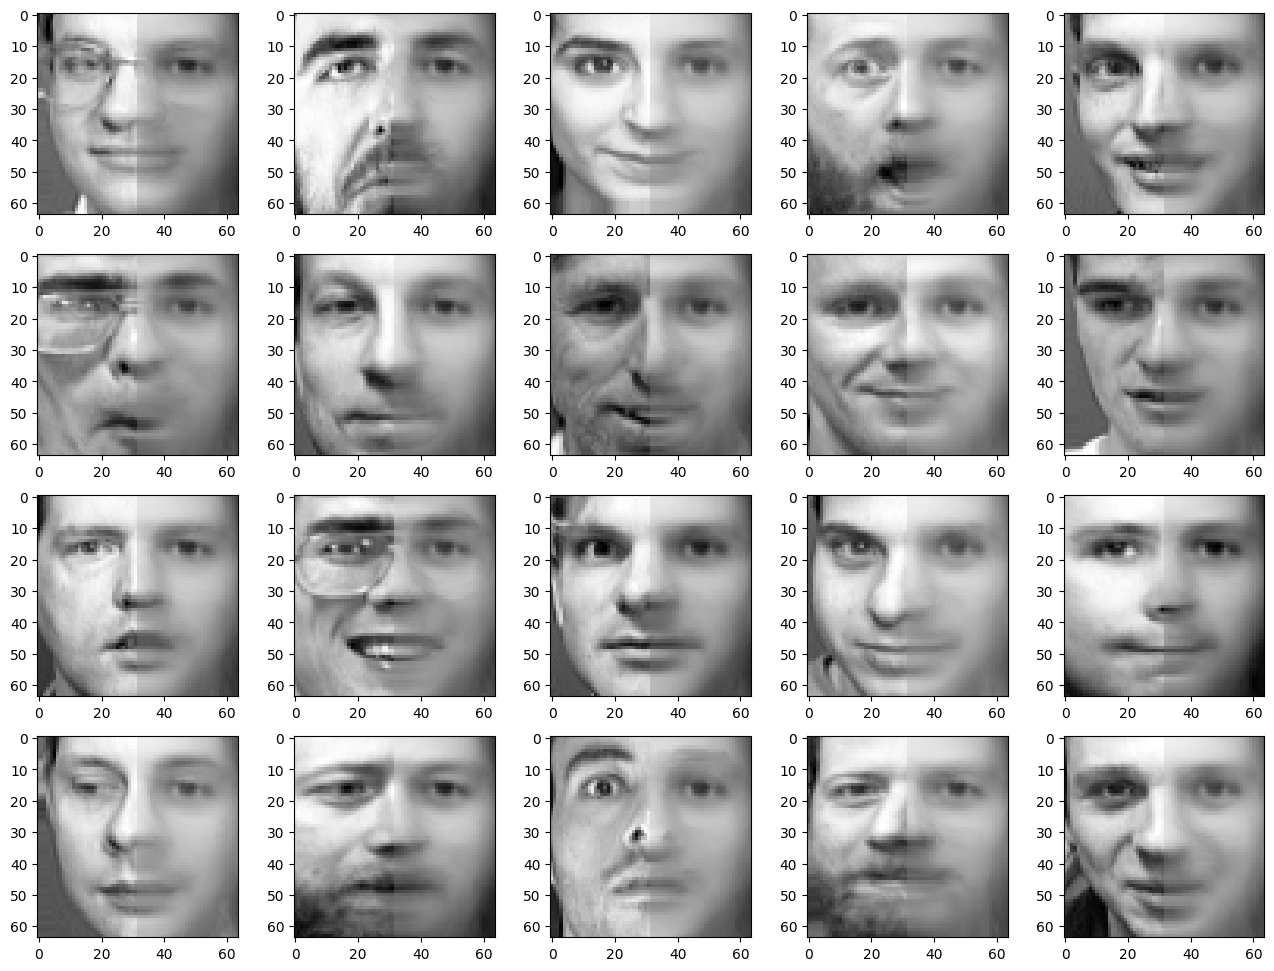

In [15]:
# Test predictions
pics = glue(X_test, lasso.predict(X_test))  # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')